### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
from mplsoccer import Radar, FontManager, grid

### Isolate CSV Files

In [18]:
csv_files = glob.glob("*.{}".format("csv"))
csv_files

['cavani_2015_stats.csv', 'cavani_2016_stats.csv']

### Combine CSV Files into single Data Frame

In [19]:
data_frames = []

for file in csv_files:
    df = pd.read_csv(file)
    data_frames.append(df)

stats_df = pd.concat(data_frames, ignore_index=True)
stats_df

,team_id,team_name,team_logo,league_id,league_name,league_country,league_logo,league_flag,league_season,games_appearances,...,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved
0,85,Paris Saint Germain,https://media.api-sports.io/football/teams/85.png,61,Ligue 1,France,https://media.api-sports.io/football/leagues/6...,https://media.api-sports.io/flags/fr.svg,2015,32,...,22,30,3,0,0,1,NaN,0,1,NaN
1,85,Paris Saint Germain,https://media.api-sports.io/football/teams/85.png,61,Ligue 1,France,https://media.api-sports.io/football/leagues/6...,https://media.api-sports.io/flags/fr.svg,2016,36,...,11,25,5,0,0,2,NaN,7,1,NaN


### Dropping Redundant Columns

In [20]:
cleaned_stats_df = stats_df.drop(["team_logo", "league_logo", "league_flag", "games_number", "games_captain", "goals_conceded", 
                                  "goals_saves", "tackles_total", "tackles_blocks", "dribbles_past", "penalty_committed", "penalty_saved"], axis=1)

cleaned_stats_df

,team_id,team_name,league_id,league_name,league_country,league_season,games_appearances,games_lineups,games_minutes,games_position,...,dribbles_attempts,dribbles_success,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_scored,penalty_missed
0,85,Paris Saint Germain,61,Ligue 1,France,2015,32,24,2305,Attacker,...,24,18,22,30,3,0,0,1,0,1
1,85,Paris Saint Germain,61,Ligue 1,France,2016,36,35,2976,Attacker,...,16,7,11,25,5,0,0,2,7,1


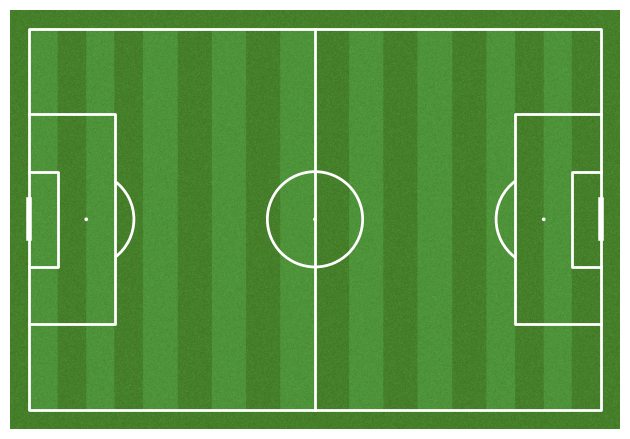

In [21]:
pitch = Pitch(pitch_color="grass", line_color="white", stripe=True)
fig, ax = pitch.draw()

In [31]:
params = ["games_appearances", "shots_total", "shots_on", "goals_total", "goals_assists"]
param_titles = ["Appearances", "Total Shots", "Shots on Target", "Goals", "Assists"]

low = [0, 0, 0, 0, 0]
high = [40, 150, 70, 40, 10]

lower_is_better = []

In [32]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [56]:
radar = Radar(param_titles, low, high, lower_is_better=lower_is_better, round_int=[False]*len(params),
              num_rings=5, ring_width=0.5, center_circle_radius=0.5)

cavani_2015 = []
cavani_2016 = []

cavani_2015.extend(cleaned_stats_df.loc[0, params].tolist())
cavani_2016.extend(cleaned_stats_df.loc[1, params].tolist())

cavani_2015
cavani_2016

[36, 144, 66, 35, 4]

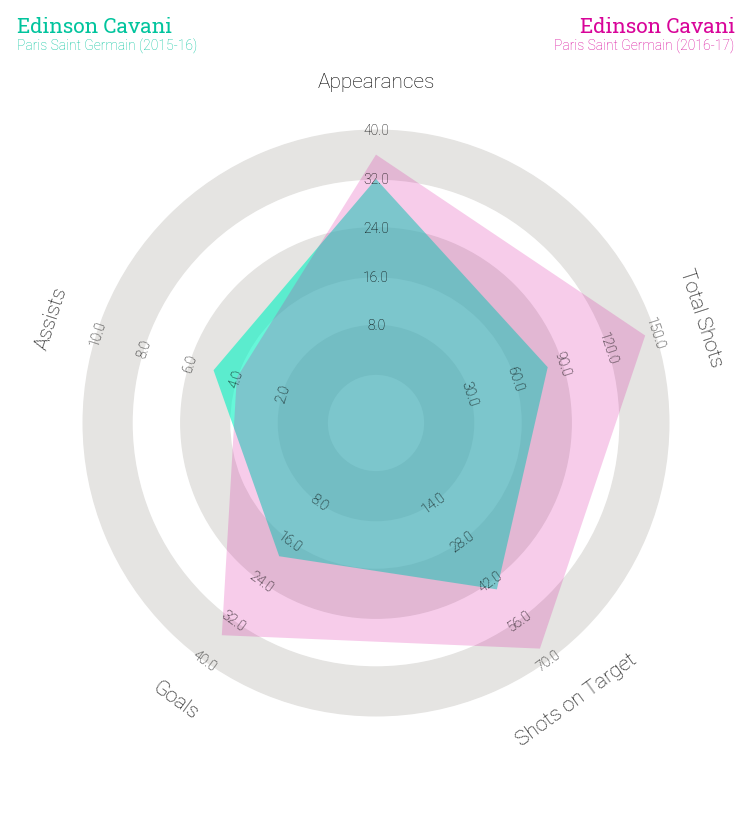

In [84]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=8, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#E5E4E2', edgecolor='#E5E4E2')
radar_output = radar.draw_radar_compare(cavani_2015, cavani_2016, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.2})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=10,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop, offset=0.5)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='', s=100, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='', s=100, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
title1_text = axs['title'].text(0.01, 0.65, 'Edinson Cavani', fontsize=15, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Paris Saint Germain (2015-16)', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Edinson Cavani', fontsize=15,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Paris Saint Germain (2016-17)', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

